# Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from tqdm import tqdm 
from itertools import product

# Read data 

In [0]:
def get_samples_and_labels_arrays(data_path):
    
    file_names = os.listdir(data_path)
    data = dict()
    for file_name in file_names:
        file_path = os.path.join(data_path, file_name)
        data[file_name] = np.loadtxt(file_path)  
            
    X = list()
    y = list()
    
    classes = {'MG-1029.txt':0, 'MG-1120.txt':1,
               'MG-1078.txt':2,'MG-1030.txt':3,
               'MG-1119.txt':4, 'MG-1084.txt':5,
               'MG-1081.txt':6, 'MG-1076.txt':7 }
    
    for label,class_data in data.items():
        for sample in class_data:
            X.append(sample)
            y.append(classes[label])

    X = np.array(X)
    y = np.array(y)    
    
    return X,y

In [0]:
training_path = 'training/'

X_train, y_train = get_samples_and_labels_arrays(training_path) 

In [0]:
test_path = 'test/'

X_test, y_test = get_samples_and_labels_arrays(test_path)    

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1320, 96) (1320,)
(560, 96) (560,)


## Plot 3D

In [0]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

colors = ListedColormap(['red', 'orange', 'yellow','green','blue','violet', 'grey'])

    
def plot_3D(X,y):

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:,0],X[:,1],X[:,2], c=y, cmap=colors)
    plt.show()
    

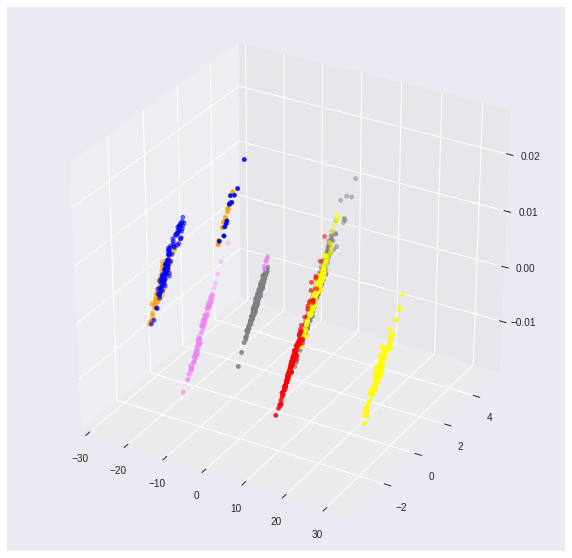

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)
X_test_3d = pca.fit_transform(X_test)

plot_3D(X_train_3d,y_train)

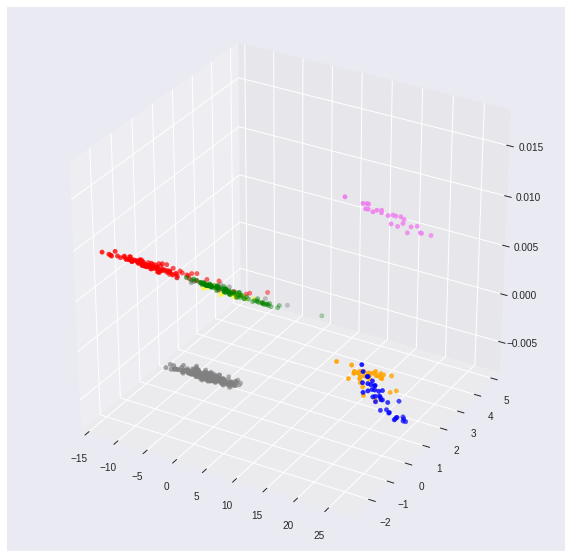

In [35]:
plot_3D(X_test_3d,y_test)

## Plot 2D

In [0]:
def plot_2D(X,y):
    fig = plt.figure(figsize=(10,10))

    plt.scatter(X[:,0],X[:,1], c=y, cmap=colors, edgecolors='k')

    plt.show() 

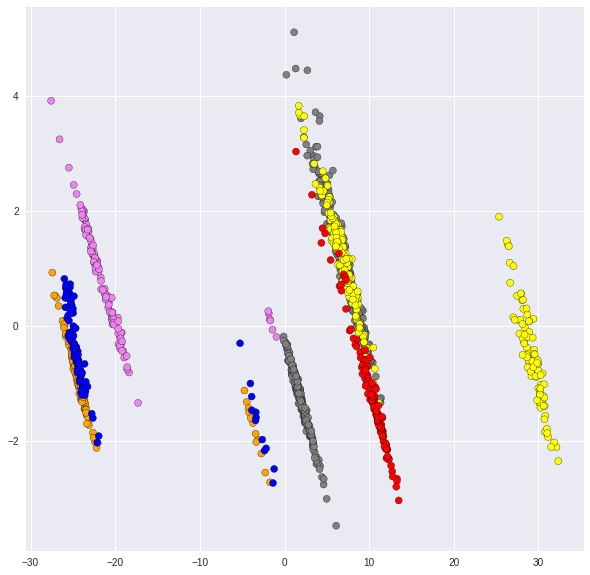

In [37]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.fit_transform(X_test)

plot_2D(X_train_2d,y_train)

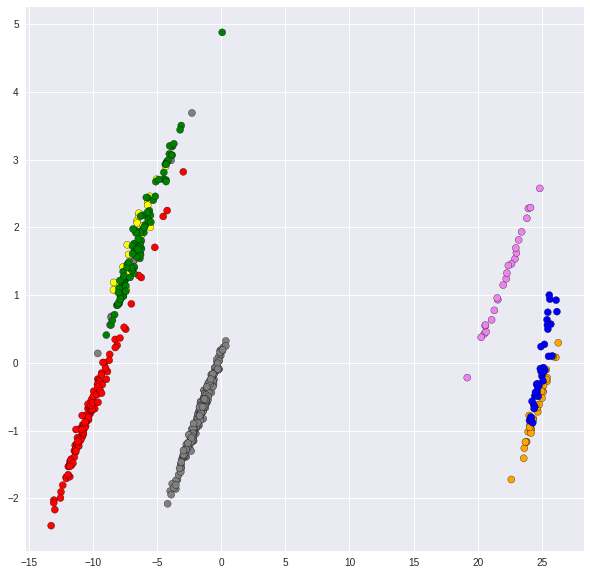

In [38]:
plot_2D(X_test_2d,y_test)

In [0]:
def plot_decision_boundaries(name,clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    clf_2d = clf
    clf_2d.fit(X,y)
    Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y,cmap=colors, s=20, edgecolor='k')
                                 
    ax.set_title(name)

# Classifiers

In [0]:

classifiers = dict()

scores = dict()

def save_classifier(clf,name,score):
    classifiers[name] = clf
    scores[name] = score

In [0]:
from sklearn.metrics import classification_report

def precision_recall(clf):
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    
def train_test_save(clf, name):
    clf.fit(X_train,y_train)
    
    precision_recall(clf)
    
    score = clf.score(X_test,y_test)
    
    save_classifier(clf,name,score)
    
    plot_decision_boundaries(name,clf,X_test_2d,y_test)  


## DecisionTreeClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        23
           3       0.00      0.00      0.00        97
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        24
           6       0.08      1.00      0.16         9
           7       1.00      1.00      1.00       232

   micro avg       0.83      0.83      0.83       560
   macro avg       0.76      0.88      0.77       560
weighted avg       0.81      0.83      0.81       560



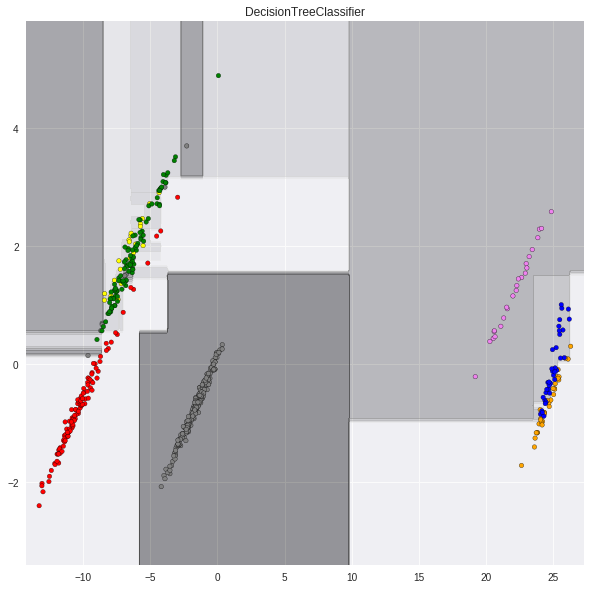

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

name = 'DecisionTreeClassifier'
train_test_save(clf, name)

## kNN

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.91      0.97      0.94        33
           2       0.37      0.43      0.40        23
           3       0.00      0.00      0.00        97
           4       0.97      0.92      0.94        37
           5       1.00      1.00      1.00        24
           6       0.08      0.89      0.14         9
           7       1.00      1.00      1.00       232

   micro avg       0.79      0.79      0.79       560
   macro avg       0.67      0.77      0.68       560
weighted avg       0.78      0.79      0.78       560



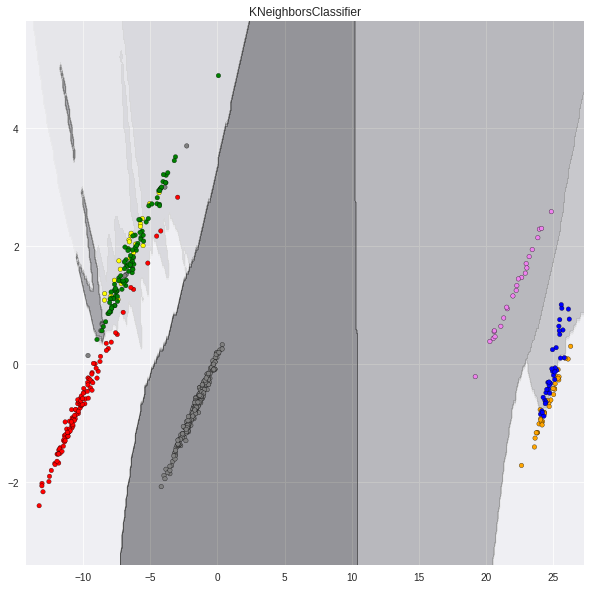

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
name = 'KNeighborsClassifier'
train_test_save(clf, name)

## SVC

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       105
           1       0.60      0.76      0.67        33
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        97
           4       0.71      0.54      0.62        37
           5       1.00      1.00      1.00        24
           6       0.06      1.00      0.11         9
           7       1.00      1.00      1.00       232

   micro avg       0.70      0.70      0.70       560
   macro avg       0.55      0.64      0.54       560
weighted avg       0.73      0.70      0.71       560



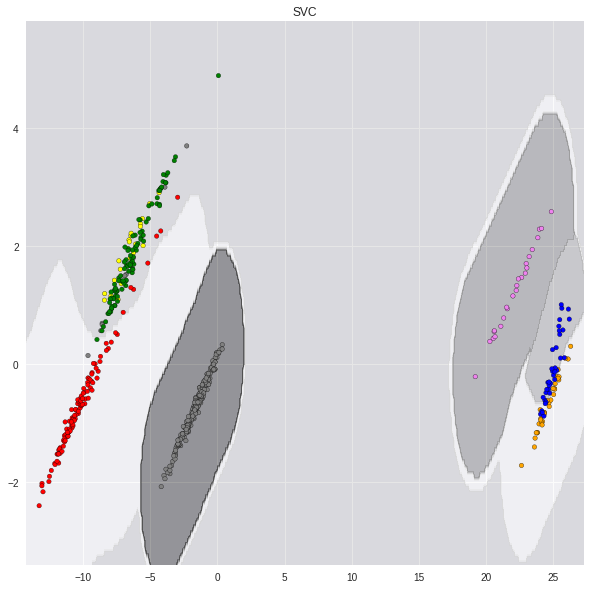

In [44]:
from sklearn.svm import SVC

clf = SVC(gamma='auto', probability=True)
name = 'SVC'

train_test_save(clf, name)

## GaussianNB

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       105
           1       0.60      0.76      0.67        33
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        97
           4       0.71      0.54      0.62        37
           5       1.00      1.00      1.00        24
           6       0.06      1.00      0.11         9
           7       1.00      1.00      1.00       232

   micro avg       0.70      0.70      0.70       560
   macro avg       0.55      0.64      0.54       560
weighted avg       0.73      0.70      0.71       560



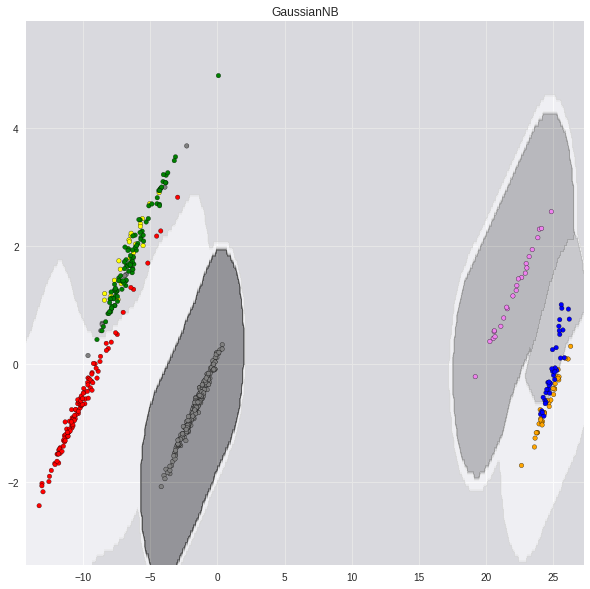

In [45]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_clf = GaussianNB()

name = 'GaussianNB'

train_test_save(clf, name)

## LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       105
           1       0.83      0.88      0.85        33
           2       0.56      0.22      0.31        23
           3       0.00      0.00      0.00        97
           4       0.89      0.84      0.86        37
           5       1.00      1.00      1.00        24
           6       0.05      0.67      0.09         9
           7       1.00      1.00      1.00       232

   micro avg       0.76      0.76      0.76       560
   macro avg       0.66      0.69      0.63       560
weighted avg       0.77      0.76      0.76       560



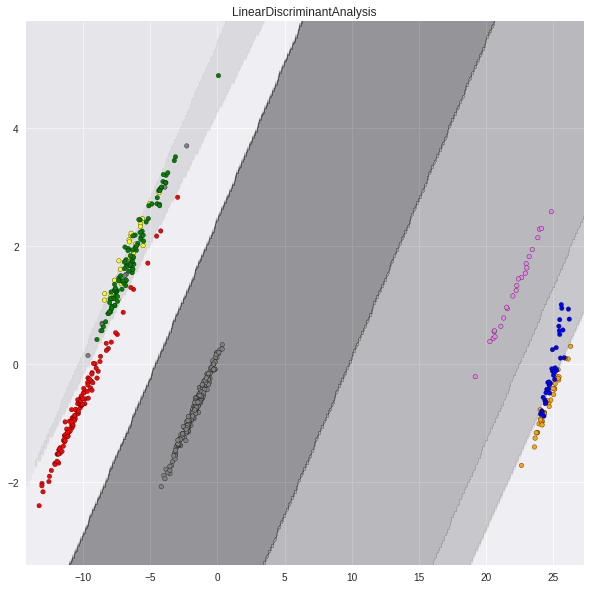

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

name = 'LinearDiscriminantAnalysis'

train_test_save(clf, name)

## QuadraticDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       105
           1       1.00      1.00      1.00        33
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        97
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        24
           6       0.06      0.89      0.11         9
           7       1.00      1.00      1.00       232

   micro avg       0.75      0.75      0.75       560
   macro avg       0.63      0.71      0.63       560
weighted avg       0.77      0.75      0.75       560



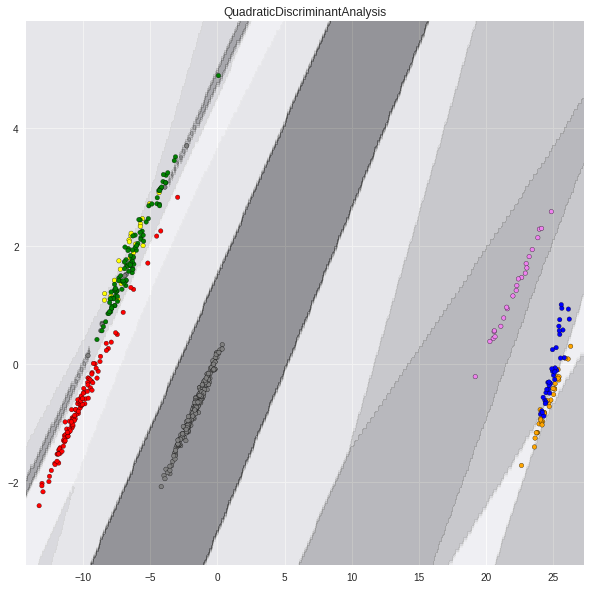

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

name = 'QuadraticDiscriminantAnalysis'

train_test_save(clf, name)

## RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.97      1.00      0.99        33
           2       0.96      0.96      0.96        23
           3       0.00      0.00      0.00        97
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        24
           6       0.08      1.00      0.16         9
           7       1.00      1.00      1.00       232

   micro avg       0.82      0.82      0.82       560
   macro avg       0.75      0.87      0.76       560
weighted avg       0.81      0.82      0.81       560



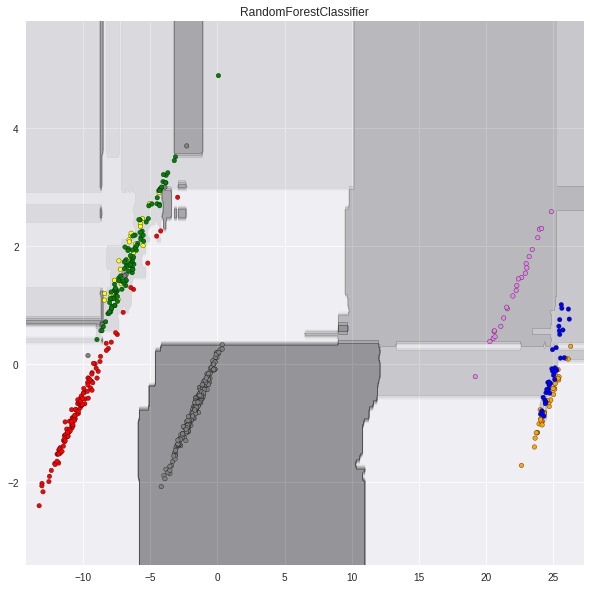

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

name = 'RandomForestClassifier'
train_test_save(clf, name)

## Stochastic Gradient Descent

In [49]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log', max_iter=100)
name = 'SGD'

clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('avg score', name, round(score,3))

avg score SGD 0.466


## Ensemble

avg score Ensemble 0.795


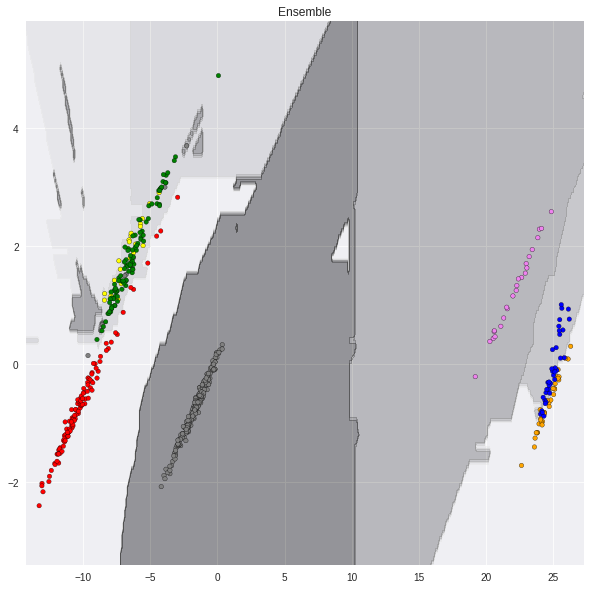

In [50]:
from sklearn.ensemble import VotingClassifier   
import warnings
warnings.simplefilter("ignore")

voters=list()
weights= list()
for name,clf in classifiers.items():
    voters.append((name,clf))
    weights.append(scores[name])
    
clf = VotingClassifier(estimators=voters, voting='soft', weights=weights)
name = 'Ensemble'

clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)

save_classifier(clf,name,score)

plot_decision_boundaries(name,clf,X_test_2d,y_test)  

print('avg score', name, round(score,3))

## Summary

In [51]:
for name, score in scores.items():
    print(name, round(score, 3))

DecisionTreeClassifier 0.827
KNeighborsClassifier 0.788
SVC 0.704
GaussianNB 0.704
LinearDiscriminantAnalysis 0.759
QuadraticDiscriminantAnalysis 0.752
RandomForestClassifier 0.823
Ensemble 0.795
